In [1]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
sns.set_theme(style="whitegrid")

df = pd.read_csv(filepath_or_buffer="output.csv")
def preprocess(df):
    df["time_ms"] = df["time_ms"].str.split().str.get(0).astype(int)
    df["language"] = df["run_type"].str.split().str.get(0)
    df["search_version"] = df["search_version"].str.split().str.get(0)# leading space
    return df
df.pipe(preprocess)
df = df.astype(
    {
        "time_ms": int,
        "language": CategoricalDtype(categories=['Java', 'Go'], ordered=False),
        "search_version": CategoricalDtype(
            categories=['V1', 'V2', 'V3', 'V4'], ordered=False
        ),
    }
)
df.head()

,run_type,search_version,results,time_ms,language
0,Go results,V1,"[web-result-for:""Go is awesome"" image-result-...",97,Go
1,Go results,V1,"[web-result-for:""Go is awesome"" image-result-...",189,Go
2,Go results,V1,"[web-result-for:""Go is awesome"" image-result-...",153,Go
3,Go results,V1,"[web-result-for:""Go is awesome"" image-result-...",110,Go
4,Go results,V1,"[web-result-for:""Go is awesome"" image-result-...",0,Go


In [3]:
df.dtypes

run_type            object
search_version    category
results             object
time_ms              int32
language          category
dtype: object

In [4]:
df.search_version.dtype

CategoricalDtype(categories=['V1', 'V2', 'V3', 'V4'], ordered=False, categories_dtype=object)

In [5]:
df.language.dtype

CategoricalDtype(categories=['Java', 'Go'], ordered=False, categories_dtype=object)

In [6]:
df.language.value_counts()

language
Java    400
Go      400
Name: count, dtype: int64

In [7]:
df = df[["language", "search_version", "time_ms"]]; df

,language,search_version,time_ms
0,Go,V1,97
1,Go,V1,189
2,Go,V1,153
3,Go,V1,110
4,Go,V1,0
...,...,...,...
795,Java,V4,58
796,Java,V4,96
797,Java,V4,21
798,Java,V4,58


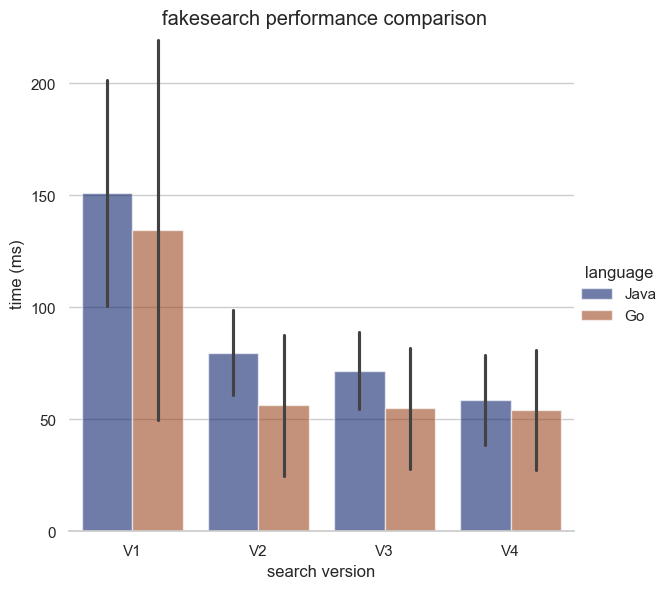

In [8]:
g = sns.catplot(
    data=df, kind="bar",
    x="search_version", y="time_ms", hue="language",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.set_axis_labels("search version", "time (ms)")
g.legend.set_title("language")
g.fig.suptitle("fakesearch performance comparison")
g.despine(left=True)

quick check if plot is used correctly

In [9]:
dfv1j = df[(df.language == "Java") & (df.search_version == "V1")]; dfv1j.describe()

,time_ms
count,100.000000
mean,151.040000
std,50.348667
min,33.000000
25%,108.000000
50%,144.000000
75%,189.000000
max,256.000000


In [10]:
dfv3g = df[(df.language == "Go") & (df.search_version == "V3")]; dfv3g.describe()

,time_ms
count,100.000000
mean,54.930000
std,27.053727
min,15.000000
25%,31.000000
50%,62.000000
75%,78.000000
max,95.000000
